# StroopActFlow
### Using Generalized Linear Model to get a nonlinear estimate of FC


#### Taku Ito
#### 1/25/2017


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.sandbox.stats.multicomp as mc
import os
import nibabel as nib
import statsmodels.api as sm
import fc

In [4]:
def convertCSVToCIFTI64k(inputfilename,outputfilename):
    ciftitemplate = '/projects3/StroopActFlow/data/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_LR.dlabel.nii'
    wb_command = 'wb_command -cifti-convert -from-text' 
    wb_command += ' ' + inputfilename 
    wb_command += ' ' + ciftitemplate
    wb_command += ' ' + outputfilename
    wb_command += " -col-delim ','"
    wb_command += ' -reset-scalars'
    os.system(wb_command)
#     print wb_command

## 0.0 Set up

In [5]:
subjNums = ['101', '102']

basedir = '/projects3/StroopActFlow/data/'
resultsdir = basedir + 'results/'
restdir = resultsdir + 'glmRest_GlasserParcels/'

glasser_nets = np.loadtxt('/projects/AnalysisTools/netpartitions/ColeLabNetPartition_v1.1/community_order.txt', delimiter=',')
# Make into python numbering (starts from 0)
glasser_nets -= 1.0
networkorder = glasser_nets.astype(int)
networkorder.shape = (len(networkorder),1)

networkmappings = {'fpn':7, 'vis':1, 'smn':2, 'con':3, 'dmn':6, 'aud1':8, 'aud2':9, 'dan':11}
networks = networkmappings.keys()

networkdef = '/projects/AnalysisTools/netpartitions/ColeLabNetPartition_v1.1/parcel_network_assignments.txt'
networkdef = np.loadtxt(networkdef, delimiter=',')
xticks = {}
reorderednetworkaffil = networkdef[networkorder]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## 1.0 Resting-state analysis

In [64]:
restmat = {}
multregfc = {}
r2_multreg = {}
# De-mean across space??
zscore=True

for subj in subjNums:
    restdat = np.loadtxt(restdir + subj + '_rest_nuisanceResids_Glasser.csv',delimiter=',')
    # Zscore
    if zscore: restdat - np.mean(restdat,axis=0)
        
    restmat[subj] = np.corrcoef(restdat)
    multregfc[subj], r2_multreg[subj] = fc.multregressionconnectivity(restdat)
    print 'Average fit of multiple linear regression FC for subj', subj
    print '\tavg r-squared =', np.mean(r2_multreg[subj])
    print '\tstd r-squared =', np.std(r2_multreg[subj])

Average fit of multiple linear regression FC for subj 101
	avg r-squared = 0.857716269213
	std r-squared = 0.0983880118164
Average fit of multiple linear regression FC for subj 102
	avg r-squared = 0.820382136467
	std r-squared = 0.10525223111


(array([  2.,   0.,   1.,   0.,   2.,   1.,   2.,   1.,   0.,   0.,   0.,
          0.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   3.,   1.,   4.,
          3.,   5.,   2.,   1.,   3.,   5.,   6.,   5.,   2.,   4.,   6.,
         14.,   4.,   3.,  10.,   9.,   3.,   6.,  10.,  13.,  13.,  12.,
          9.,  10.,  11.,   6.,  12.,   9.,   5.,   9.,   9.,   6.,   6.,
          5.,   9.,   8.,   6.,   4.,   5.,   4.,   8.,   8.,   2.,   3.,
          4.,   5.,   1.,   4.,   4.,   3.,   2.,   0.,   2.,   2.,   0.,
          2.,   3.,   1.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          1.]), array([ -5.47906517e-03,  -5.36084256e-03,  -5.24261995e-03,
         -5.12439734e-03,  -5.00617472e-03,  -4.88795211e-03,
         -4.76972950e-03,  -4.65150689e-03,  -4.53328428e-03,
         -4.41506167e-03,  -4.29683905e-03,  -4.17861644e-03,
         -4.06039383e-03,  -3.94217122e-03,  -3.82394861e-03,
         

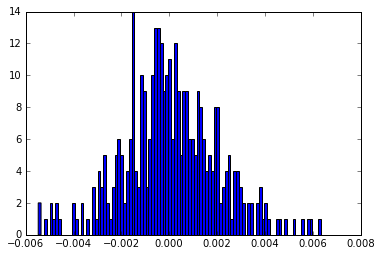

In [65]:
plt.hist(np.diag(multregfc[subj]),100)

#### Run with a non-canonical Gaussian fit (i.e., tanh transfer function)
* y-variables are transformed with a arctanh

In [49]:
tanhFC = {}
r2_tanh = {}
for subj in subjNums:
    restdat = np.loadtxt(restdir + subj + '_rest_nuisanceResids_Glasser.csv',delimiter=',')
    print 'Running on subj', subj
    tanhFC[subj], r2_tanh[subj] = fc.tanhFC(restdat)
    print 'Average fit of tanh regression FC for subj', subj
    print '\tavg r-squared =', np.mean(r2_tanh[subj])
    print '\tstd r-squared =', np.std(r2_tanh[subj])

Running on subj 101
Average fit of tanh regression FC for subj 101
	avg r-squared = 0.820112902024
	std r-squared = 0.0850908181782
Running on subj 102
Average fit of tanh regression FC for subj 102
	avg r-squared = 0.789994550338
	std r-squared = 0.0952466906719


#### Run with a non-canonical Gaussian fit (i.e., square root transfer function)
* y-variables are transformed with a squared

In [52]:
sqrootFC = {}
r2_sqroot = {}
for subj in subjNums:
    restdat = np.loadtxt(restdir + subj + '_rest_nuisanceResids_Glasser.csv',delimiter=',')
    print 'Running on subj', subj
    sqrootFC[subj], r2_sqroot[subj] = fc.squareRootFC(restdat)
    print 'Average fit of sqroot regression FC for subj', subj
    print '\tavg r-squared =', np.mean(r2_sqroot[subj])
    print '\tstd r-squared =', np.std(r2_sqroot[subj])

Running on subj 101
Average fit of tanh regression FC for subj 101
	avg r-squared = 0.486360280854
	std r-squared = 0.0581272860504
Running on subj 102
Average fit of tanh regression FC for subj 102
	avg r-squared = 0.411499638155
	std r-squared = 0.0460211893807


#### Run with a non-canonical Gaussian fit (i.e., squared transfer function)
* y-variables are transformed with a squared

In [54]:
squareFC = {}
r2_square = {}
for subj in subjNums:
    restdat = np.loadtxt(restdir + subj + '_rest_nuisanceResids_Glasser.csv',delimiter=',')
    print 'Running on subj', subj
    squareFC[subj], r2_square[subj] = fc.squareFC(restdat)
    print 'Average fit of square regression FC for subj', subj
    print '\tavg r-squared =', np.mean(r2_square[subj])
    print '\tstd r-squared =', np.std(r2_square[subj])

Running on subj 101
Average fit of tanh regression FC for subj 101
	avg r-squared = 0.845576249166
	std r-squared = 0.0966071128075
Running on subj 102
Average fit of tanh regression FC for subj 102
	avg r-squared = 0.806351171829
	std r-squared = 0.102285665717


### 1.1 Plot rest matrices for each subject with canonical Pearson FC

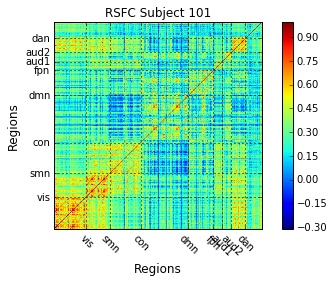

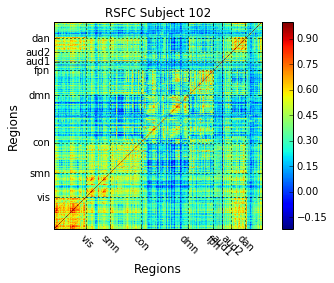

In [154]:
for subj in subjNums:
    plt.figure()
    plt.title('RSFC Subject ' + subj)
    plt.imshow(restmat[subj][networkorder,networkorder.T],origin='lower')
    plt.xlabel('Regions',fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.xticks(xticks.keys(),xticks.values(), rotation=-45)
    plt.yticks(xticks.keys(),xticks.values())
    plt.grid(linewidth=1)
    plt.tight_layout()
    plt.colorbar()
#     plt.savefig(subj + '_RSFC_PearsonCorr.pdf')

### 1.2 Plot rest matrices for each subject with MultRegFC

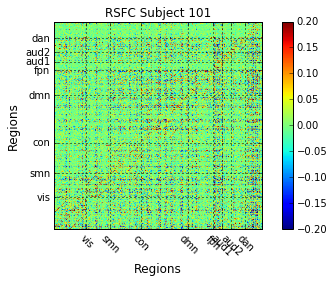

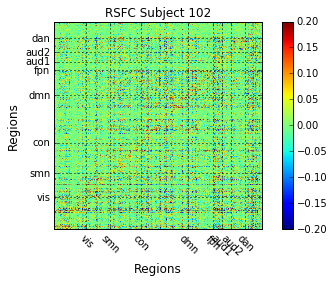

In [12]:
for subj in subjNums:
    plt.figure()
    plt.title('RSFC Subject ' + subj)
    plt.imshow(multregfc[subj][networkorder,networkorder.T],origin='lower',vmin=-.2,vmax=.2)
    plt.xlabel('Regions',fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.xticks(xticks.keys(),xticks.values(), rotation=-45)
    plt.yticks(xticks.keys(),xticks.values())
    plt.grid(linewidth=1)
    plt.tight_layout()
    plt.colorbar()
#     plt.savefig(subj + '_RSFC_PearsonCorr.pdf')

### 1.3 Plot rest matrices for each subject with tanhFC

(array([  2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   1.20000000e+01,   8.00000000e+00,
          2.00000000e+01,   2.80000000e+01,   5.40000000e+01,
          6.20000000e+01,   6.60000000e+01,   9.40000000e+01,
          1.78000000e+02,   1.68000000e+02,   2.12000000e+02,
          2.60000000e+02,   3.20000000e+02,   3.92000000e+02,
          5.26000000e+02,   6.34000000e+02,   7.16000000e+02,
          8.70000000e+02,   1.08000000e+03,   1.17200000e+03,
          1.47200000e+03,   1.64600000e+03,   1.83600000e+03,
          1.98200000e+03,   2.32600000e+03,   2.36000000e+03,
          2.67000000e+03,   2.89800000e+03,   3.02600000e+03,
          3.16200000e+03,   3.17200000e+03,   3.50400000e+03,
          3.48000000e+03,   3.78600000e+03,   3.72800000e+03,
          3.74200000e+03,   3.71800000e+03,   3.86600000e+03,
          3.87800000e+03,   3.90800000e+03,   3.82200000e+03,
          3.76200000e+03,   3.77600000e+03,   3.54000000e+03,
        

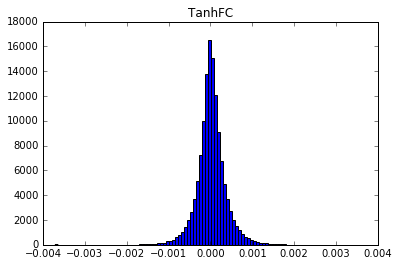

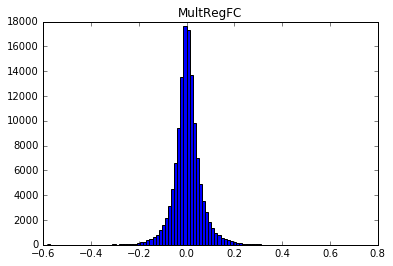

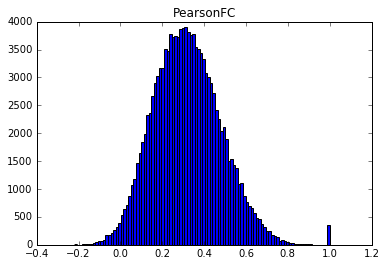

In [40]:
plt.figure()
plt.title("TanhFC")
plt.hist(np.reshape(tanhFC[subj],-1),100)

plt.figure()
plt.title("MultRegFC")
plt.hist(np.reshape(multregfc[subj],-1),100)

plt.figure()
plt.title("PearsonFC")
plt.hist(np.reshape(restmat[subj],-1),100)

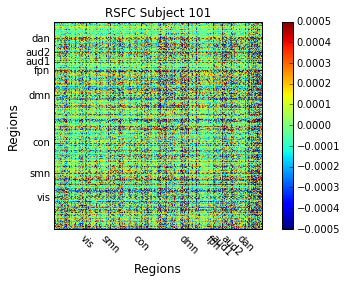

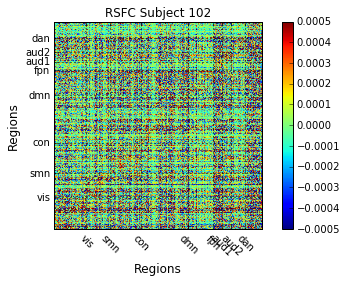

In [36]:
for subj in subjNums:
    plt.figure()
    plt.title('RSFC Subject ' + subj)
    plt.imshow(tanhFC[subj][networkorder,networkorder.T],origin='lower', vmin=-.0005, vmax=.0005)
    plt.xlabel('Regions',fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.xticks(xticks.keys(),xticks.values(), rotation=-45)
    plt.yticks(xticks.keys(),xticks.values())
    plt.grid(linewidth=1)
    plt.tight_layout()
    plt.colorbar()
#     plt.savefig(subj + '_RSFC_PearsonCorr.pdf')

### 1.3 Plot rest matrices for each subject with GLM (fit to log func)

In [22]:
nregions = 360
interaction_mat = np.zeros((nregions,nregions)) 
activityMatrix = restdat
targetregion= 1
otherregions = range(nregions)
otherregions = np.delete(otherregions, targetregion) # Delete target region from 'other regiosn'
X = activityMatrix[otherregions,:].T
# Add 'constant' regressor
X = sm.add_constant(X)
y = activityMatrix[targetregion,:]
# Fit a Generalized Linear Model with a log func (as opposed to identity func)
gauss_log = sm.GLM(y,X,family=sm.families.Gaussian(sm.families.links.log))
gauss_log_results = gauss_log.fit()
interaction_mat[otherregions, targetregion] = gauss_log_results.params[1:]

TypeError: 'NoneType' object has no attribute '__getitem__'

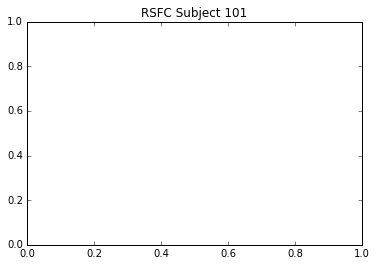

In [15]:
for subj in subjNums:
    plt.figure()
    plt.title('RSFC Subject ' + subj)
    plt.imshow(logFC[subj][networkorder,networkorder.T],origin='lower',vmin=-.2,vmax=.2)
    plt.xlabel('Regions',fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.xticks(xticks.keys(),xticks.values(), rotation=-45)
    plt.yticks(xticks.keys(),xticks.values())
    plt.grid(linewidth=1)
    plt.tight_layout()
    plt.colorbar()
#     plt.savefig(subj + '_RSFC_PearsonCorr.pdf')